In [7]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

In [8]:
geom = ase.io.read("../xyz_files/clars_goblet.xyz")
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []

for at in geom:
    orb.append(at.position[:2])

In [16]:
f = open("../sorted_ev_ev.txt","r")
#print(f.readline())

chemical_potential = 0.625
num_lines = sum(1 for line in open('../sorted_ev_ev.txt', "r"))
print(num_lines)
num_values_evecs = int(num_lines / 2)

evals = np.zeros(num_lines, dtype=float)
evecs_shape = (num_lines, num_values_evecs)
evecs = np.zeros(evecs_shape, dtype=complex)

total_spin_up = np.zeros(int(num_lines/2), dtype=float)
total_spin_down = np.zeros(int(num_lines/2), dtype=float)
up_spins = 0
down_spins = 0

evals_up = np.zeros(num_values_evecs, dtype=float)
evals_down = np.zeros(num_values_evecs, dtype=float)
counter_up = 0
counter_down = 0
    
counter = 0
word_count = 0

for line in f:
    #if(counter == 39):
     #   print("Line: " + str(counter))
      #  print(line[:3])
       # print(line)
        
    spin = line[:2]

    line = line[3:]

    splitted_line = line.split(' ')

    evals[counter] = np.float64(splitted_line[0])
    
    if(spin == 'su'):
        evals_up[counter_up] = evals[counter] - chemical_potential
        counter_up = counter_up + 1
    if(spin == 'sd'):
        evals_down[counter_down] = evals[counter] - chemical_potential
        counter_down = counter_down + 1
    
    #print("spin: " + str(spin) + "\teval: " + str(evals[counter]))
    splitted_line.pop(0)
    
    x = ''
    y = ''
    y_turn = False
    
    for j in range(len(splitted_line)):    
        for i in splitted_line[j]:
            if(i == '(' or i == ' '):
                continue
            if(i != ',' and y_turn == False):
                x += i
            elif(i == ','):
                y_turn = True
                continue
            elif(i != ')'):
                y += i
            else:
                evecs[counter, word_count] = complex(float(x), float(y))
                x = ''
                y = ''
                word_count = word_count + 1
                y_turn = False


    word_count = 0
    counter = counter + 1
    
    if(spin == 'su'):
        if(chemical_potential > evals[counter-1]):
            up_spins = up_spins + 1
            total_spin_up = np.add(total_spin_up, np.square(evecs[counter-1]))
    if(spin == 'sd'):
        if(chemical_potential > evals[counter-1]):
            down_spins = down_spins + 1
            total_spin_down = np.add(total_spin_down, np.square(evecs[counter-1]))
            
    if counter == num_lines-1:
        break
        
print("total up spins: " + str(up_spins))
print("total down spins: " + str(down_spins))
print(total_spin_up)
print(total_spin_down)
spin_difference = ((total_spin_up - total_spin_down))
print(np.shape(spin_difference))
print(spin_difference)

print("evals spin up: " + str(evals_up))
print("evals spin down: " + str(evals_down))

77
total up spins: 20
total down spins: 20
[0.49619807+0.j 0.53191194+0.j 0.49619919+0.j 0.4961946 +0.j
 0.53191447+0.j 0.49598597+0.j 0.50910046+0.j 0.49505674+0.j
 0.53220945+0.j 0.4961952 +0.j 0.53220655+0.j 0.49505823+0.j
 0.50910028+0.j 0.53220132+0.j 0.49506013+0.j 0.50909803+0.j
 0.49598706+0.j 0.53220327+0.j 0.49505806+0.j 0.50909945+0.j
 0.57526368+0.j 0.49138788+0.j 0.57662501+0.j 0.49192317+0.j
 0.49192444+0.j 0.63658265+0.j 0.57526074+0.j 0.49138942+0.j
 0.57662123+0.j 0.49192528+0.j 0.576621  +0.j 0.49139231+0.j
 0.57525791+0.j 0.49192524+0.j 0.63658402+0.j 0.57526385+0.j
 0.49138843+0.j 0.5766235 +0.j]
[0.50380342+0.j 0.52886054+0.j 0.50380159+0.j 0.5038062 +0.j
 0.52885844+0.j 0.50408641+0.j 0.50604339+0.j 0.50497619+0.j
 0.5285895 +0.j 0.50380561+0.j 0.52859207+0.j 0.50497474+0.j
 0.50604433+0.j 0.52859717+0.j 0.50497328+0.j 0.50604551+0.j
 0.5040847 +0.j 0.52859481+0.j 0.50497466+0.j 0.50604433+0.j
 0.56116397+0.j 0.50865839+0.j 0.55955389+0.j 0.50813492+0.j
 0.5081334

In [17]:
ed = num_lines//2
print(num_lines, ed)
homo = ed-1

77 38


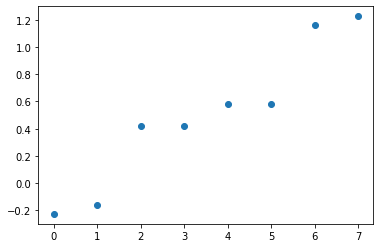

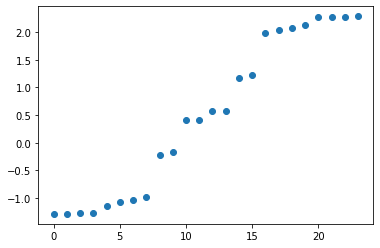

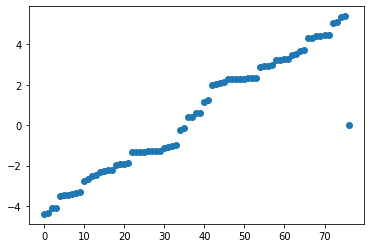

-0.226487
-0.162959
0.419379
0.419387
0.580613
0.580621
1.16296
1.22649


In [18]:
plt.plot(evals[ed-4:ed+4], 'o')
plt.show()

plt.plot(evals[ed-12:ed+12], 'o')
plt.show()

plt.plot(evals[:], 'o')
plt.show()


for ev in evals[ed-4:ed+4]:
    print(ev)

In [19]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=3.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = (1.0-phase, 0.0, phase)
        circ = plt.Circle(p[:2], np.cbrt(mod), color=col, zorder=10)
        ax.add_artist(circ)

(-8, 8)

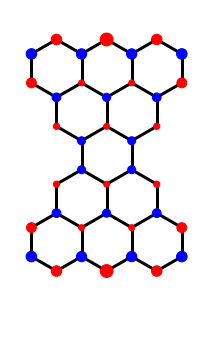

In [20]:
fig=plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect('equal')
visualize_backbone(ax, geom)
visualize_evec(ax, geom, spin_difference)
plt.axis('off')
plt.xlim([-5, 5])
plt.ylim([-8, 8])

#plt.savefig("./figures_clars/spin_diff.png", dpi=300, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../figures/figures_test_hub/orb_36_-1.png'

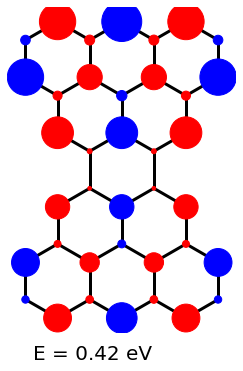

In [21]:
for ind in range(ed-2,ed+2):
    fig=plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.set_aspect('equal')
    visualize_backbone(ax, geom)
    visualize_evec(ax, geom, evecs[ind,:])
    plt.axis('off')
    xmin = np.min(geom.positions[:, 0])-0.7
    xmax = np.max(geom.positions[:, 0])+0.7
    ymin = np.min(geom.positions[:, 1])+1.0
    ymax = np.max(geom.positions[:, 1])+1.0
    plt.xlim([xmin, xmax])
    plt.text(xmin+1.0, ymin-2.6, "E = %.2f eV" % evals[ind], fontsize=20)
    plt.savefig("../figures/figures_test_hub/orb_%d_%d.png" % (ind, ind-homo), dpi=300, bbox_inches='tight')

Down spin ev: -4.99584
Down spin ev: -4.70375
Down spin ev: -4.06294
Down spin ev: -4.03645
Down spin ev: -3.92545
Down spin ev: -3.30211
Down spin ev: -3.11033
Down spin ev: -2.85804
Down spin ev: -2.85744
Down spin ev: -2.56691
Down spin ev: -2.51411
Down spin ev: -1.91454
Down spin ev: -1.90833
Down spin ev: -1.90628
Down spin ev: -1.89778
Down spin ev: -1.70607
Down spin ev: -1.6088
Down spin ev: -0.787959
Down spin ev: -0.044386999999999954
Down spin ev: -0.044378999999999946
Up spin ev: -5.02072
Up spin ev: -4.73804
Up spin ev: -4.109859999999999
Up spin ev: -4.0725
Up spin ev: -3.96676
Up spin ev: -3.37006
Up spin ev: -3.14256
Up spin ev: -2.92308
Up spin ev: -2.91951
Up spin ev: -2.61403
Up spin ev: -2.56644
Up spin ev: -1.95311
Up spin ev: -1.94406
Up spin ev: -1.94218
Up spin ev: -1.93544
Up spin ev: -1.7623
Up spin ev: -1.66975
Up spin ev: -0.851487
Up spin ev: -0.205621
Up spin ev: -0.205613


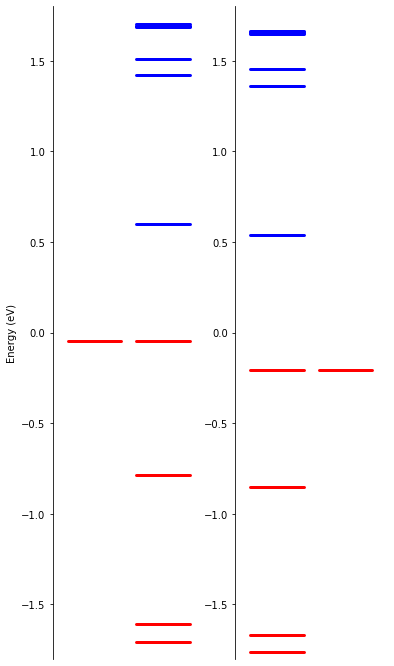

In [22]:
chemical_potential = 0.625
past_ev = -100


fig = plt.figure(figsize=(6, 12))
plt.subplot(121)
ax = plt.gca()
for ev in evals_down:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
        print("Down spin ev: " + str(ev))
    if(ev > past_ev + 0.001):
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev = ev


ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-1.8, 1.8)
plt.ylabel("Energy (eV)")

###

plt.subplot(122)
ax = plt.gca()
for ev in evals_up:
    
    col = 'blue'
    if ev < 0.0:
        col = 'red'
        print("Up spin ev: " + str(ev))
    if(ev > past_ev + 0.001):
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev = ev
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-1.8, 1.8)
#plt.ylabel("Energy (eV)")

plt.show()

In [ ]:
fig = plt.figure(figsize=(2, 12))
ax = plt.gca()
for ev in evals[ed-ed:ed*2]:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
    plt.plot([0.1, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-3.0, 3.0)
plt.ylabel("Energy (eV)")
plt.savefig("../figures/figures_test_hub/levels.png", dpi=300, bbox_inches='tight')